## 2.アヤメの分類
Week3で使用したirisデータセットを使い、分類問題を解く練習をします。  

irisデータセットはカナダのガスペ半島のある牧草地で同じ日に採取された以下の3種類のアヤメ、合計150本のデータでした。  

Iris setosa - Wikipedia  
Iris virgicolor - Wikipedia  
Iris virginica - Wikipedia  

4種類の特徴量（説明変数）からアヤメの種類を推測する問題が設定できます。アヤメの種類を 分類 するので、こういったものを分類問題と呼びます。  

今回使う手法の一覧  
scikit-laernを使い以下の手法で学習と推定を行っていきます。それぞれの手法についての詳細は今の段階では扱いません。ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。  

・最近傍法  
・ロジスティック回帰  
・SVM  
・決定木  
・ランダムフォレスト  

## 3.分類問題の流れ
まず、最近傍法を例に分類問題を解く基本的な流れを紹介します。課題の後半ではこれを参考に他の手法にも適用してもらいます。  

この流れについては後々より深く学び、実践していきます。今回の課題では大まかな流れの把握を行ってください。  

■練習のための準備  

練習する上で結果の可視化を行いたいため、特徴量は4つの中で2つだけを使うことにします。こうすることで2次元の散布図を描き確認することができます。また、問題を単純化するためアヤメの種類を2つだけ使うことにします。分類対象が2種類の場合を 2値分類 と呼び、それ以上の 多値分類 とは区別をします。それぞれで手法や評価方法が変わります。今回はまずより基本的な2値分類を行います。



## 【課題1】練習のために特徴量とカテゴリを選択
選び方は合計18通りありますが、以下の組み合わせで練習することにします。irisデータセットをWeek3同様に取得した後、データフレームからこれらを抜き出してください。  

・virgicolorとvirginica  
・sepal_lengthとpetal_length  

＜実際の問題では？＞  

実際の問題を解く上でも結果の可視化は有効です。しかし、そのために学習や推定に使う特徴量を2つに絞るのは望ましくありません。そのため学習や推定は多次元で行い、可視化をする際にだけ主成分分析などの特徴抽出手法を適用するといったことが行われます。また、Week3で利用した散布図行列を使い可視化することも可能です。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#import japanize_matplotlib
from sklearn.datasets import load_iris
import seaborn as sns
import japanize_matplotlib

In [2]:
iris_dataset = load_iris()

X = pd.DataFrame(iris_dataset.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],)# 特徴量をDF化
Y = pd.DataFrame(iris_dataset.target, columns=['Species'])# ラベルをDF化

# display(X.head())
# display(Y.head())

pd.set_option('display.max_rows', 500)#出力を省略しない

# 特定の特徴量、ラベルを削除

drop_col = ['sepal_width', 'petal_width']
new_X = X.drop(drop_col, axis=1)
new_Y = Y.drop(Y.index[0:50])
display(new_X.head(), new_X.tail(), new_Y.head(), new_Y.tail())

# 抜き出したデータフレームを連結し、インデックスを振りなおす

df = pd.concat([new_X, new_Y], axis=1)
df = df[50:].reset_index(drop=True)
display(df.head())
display(df.tail())


,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


,sepal_length,petal_length
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4
149,5.9,5.1


,Species
50,1
51,1
52,1
53,1
54,1


,Species
145,2
146,2
147,2
148,2
149,2


,sepal_length,petal_length,Species
0,7.0,4.7,1.0
1,6.4,4.5,1.0
2,6.9,4.9,1.0
3,5.5,4.0,1.0
4,6.5,4.6,1.0


,sepal_length,petal_length,Species
95,6.7,5.2,2.0
96,6.3,5.0,2.0
97,6.5,5.2,2.0
98,6.2,5.4,2.0
99,5.9,5.1,2.0


## 【問題2】データの分析
まずはデータの分析を行いますが、これはWeek3の課題1で行いました。その際出力した散布図行列を見ることで、先ほどの18通りそれぞれの散布図も確認できます。sepal_lengthとpetal_lengthを使い、virgicolorとvirginicaを分類するのは少し難しそうな状況であることが分かるはずです。　　

ここでは復習を兼ねて、抜き出したデータの散布図と箱ひげ図（boxplot）、バイオリン図（violinplot）を表示してください。　　

＜実際の問題では？＞　　

このデータ分析の結果を元に前処理として特徴量エンジニアリングを行っていきます。　　

今回はsepal_lengthとpetal_lengthを抜き出しましたが、分析した上で、問題を少々難しくするための前処理をしたと言えます。　　

前処理　　
データに加工をしていきます。　　



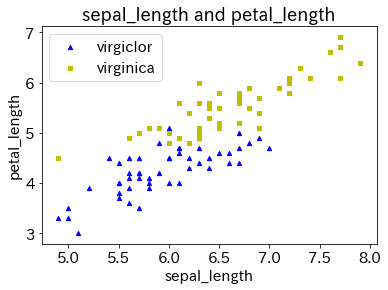

In [3]:
#散布図を作成

plt.rcParams["font.size"] = 15

plt.title("sepal_length and petal_length")
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.scatter(df.iloc[:50, 0], df.iloc[:50, 1], c='b',marker='^', s=18, label="virgiclor")
plt.scatter(df.iloc[50:, 0], df.iloc[50:, 1], c='y',marker='s', s=18, label="virginica")
plt.legend()
plt.show()


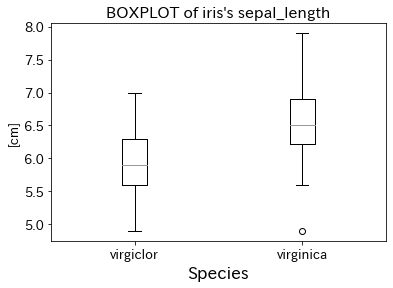

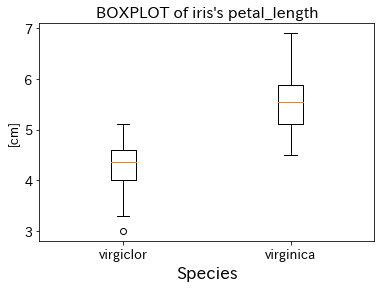

In [4]:
#　箱ひげ図を作成

# virgiclor、virginica（ラベル）
# sepal_length  petal_length（特徴量）

features = ["sepal_length", "petal_length"]

iris_dataset.target_names[0] = 'virgiclor' #datasetのtarget_namesの名前を入れ替える
iris_dataset.target_names[1] = 'virginica'

for feature in features:
    plt.rcParams["font.size"] = 13
    plt.boxplot([df[df["Species"]==1][feature], df[df["Species"]==2][feature]])
    plt.xticks([1, 2], iris_dataset.target_names)
    plt.title("BOXPLOT of iris's {}".format(feature))
    plt.ylabel('[cm]')
    plt.xlabel('Species', fontsize= 17)
    plt.show()

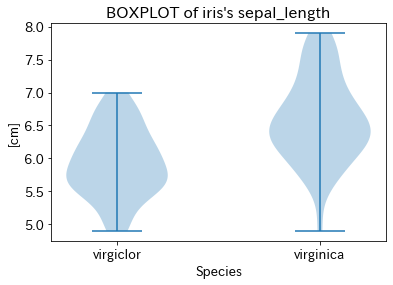

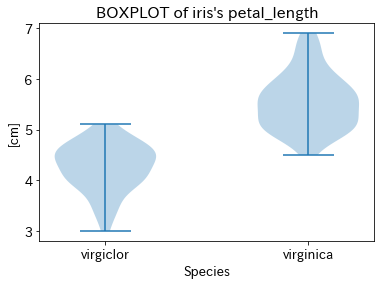

In [5]:
# 特徴量を一つずつ選び、バイオリン図を使ってラベルごとのデータの分布を可視化する

features = ["sepal_length", "petal_length"]

for feature in features:
    plt.violinplot([df[df["Species"]==1][feature], df[df["Species"]==2][feature]])
    plt.xticks([1, 2], iris_dataset.target_names)
    plt.title("BOXPLOT of iris's {}".format(feature))
    plt.ylabel('[cm]')
    plt.xlabel('Species')
    plt.show()

## 【問題3】前処理・訓練用データと検証用データの分割   
前処理の一貫として、訓練用（train）データと検証用（validation）データの分割を行います。今回は訓練用データ75%、検証用データ25%として分割してください。  

scikit-learnのtrain_test_splitが利用できます。公式ドキュメントのExamplesを参考に動かしてください。  

sklearn.model_selection.train_test_split — scikit-learn 0.20.0 documentation  

＜注意点＞  

データの分析まではPandasのDataFrameを使用してきました。しかし、scikit-learnはNumPyのndarrayを想定して作られています。そのため、この段階でndarrayへの変換を行いましょう。特徴量（説明変数）をX、正解（目的変数）をyというndarrayに格納します。  

＜分割する理由＞  

分類問題の目的は未知のデータを正しく分類することです。その目的が達成できているかを確認するため、実際には答えの分かっているデータの一部を学習には使わず残しておきます。この学習に使用していないデータで推定を行い、そこから求めた指標値によって検証します。学習に使うデータを訓練用データ、検証に使うデータが検証用データで、一般的に7対3から8対2程度の割合にします。

In [6]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :2].values #新たに2つの特徴量をデータフレーム化し変数に格納
Y = df.iloc[:, 2:].values #新たにラベルをデータフレーム化し変数に格納
display(X[:5], Y[:5])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,train_size=0.75)
print(X_train[:10])
print(X_test[:10])
print(Y_train.T[:10])
print(Y_test.T[:10])

array([[7. , 4.7],
       [6.4, 4.5],
       [6.9, 4.9],
       [5.5, 4. ],
       [6.5, 4.6]])

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

[[6.  5.1]
 [5.9 4.2]
 [6.7 5.7]
 [5.4 4.5]
 [6.8 5.9]
 [7.7 6.1]
 [6.1 4.6]
 [7.3 6.3]
 [6.1 4.9]
 [7.  4.7]]
[[6.3 5.6]
 [6.5 5.8]
 [7.6 6.6]
 [5.9 5.1]
 [6.4 4.5]
 [6.9 5.4]
 [6.8 5.5]
 [5.  3.3]
 [6.1 5.6]
 [5.7 5. ]]
[[1. 1. 2. 1. 2. 2. 1. 2. 2. 1. 1. 2. 2. 2. 1. 1. 1. 2. 1. 1. 2. 1. 2. 1.
  1. 1. 2. 2. 1. 2. 1. 2. 1. 1. 1. 1. 2. 1. 2. 2. 1. 1. 2. 1. 2. 1. 1. 2.
  1. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 2. 2. 2. 1. 2. 1. 2. 1. 1. 2.
  2. 2. 1.]]
[[2. 2. 2. 2. 1. 2. 2. 1. 2. 2. 1. 2. 2. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1.
  2.]]


C:\Users\ykenk\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## 【問題4】前処理・標準化
分類精度をあげるための加工を行います。手法ごとに適切な方法は異なりますが、ここでは一例として 標準化 を行うことにします。  

標準化を行うライブラリもscikit-learnに用意されています。これを使って標準化してください。  

sklearn.preprocessing.StandardScaler — scikit-learn   0.20.2 documentation  

＜注意点＞  

標準化は訓練用のデータでfitを行い、訓練用、検証用双方のデータにtransformを行います。検証用データは学習の段階には存在しない未知のデータの代わりなので、標準化のための平均や標準偏差の計算に使ってはいけません。  

＜実際の問題での前処理は？＞  

アヤメのデータセットのように綺麗で扱いやすい状況で提供されることはまずありません。分析を行いながら、様々な加工が必要になってきます。例えばWeek3の課題2で行った欠損値の確認の後、場合により欠損値の補間も行います。外れ値の確認や、複数のデータセットの整理などもあります。

In [7]:
# >>> from sklearn.preprocessing import StandardScaler
# >>> data = [[0, 0], [0, 0], [1, 1], [1, 1]]
# >>> scaler = StandardScaler()
# >>> print(scaler.fit(data))
# StandardScaler(copy=True, with_mean=True, with_std=True)
# >>> print(scaler.mean_)
# [0.5 0.5]
# >>> print(scaler.transform(data))
# [[-1. -1.]
#  [-1. -1.]
#  [ 1.  1.]
#  [ 1.  1.]]
# >>> print(scaler.transform([[2, 2]]))
# [[3. 3.]]

In [8]:
# 標準化を行う

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#　訓練データを標準化
print("X_trainを標準化処理を行う：\n{}".format(scaler.fit(X_train)))
print("-----------------")

#　標準化した値の平均値は
print("標準化した平均値は\n{}".format(scaler.mean_))
print("-----------------")

#　訓練用のデータを変形する
new_X_train = scaler.transform(X_train) #変形した訓練データを変数に格納
print("変形した訓練データは\n{}".format(new_X_train[:10])) # 長くなるので10行目まで表示
# print("確認{}".format(X_train[:10]))
print("-----------------")

#　検証用のデータを変形する
new_X_test = scaler.transform(X_test) #変形した検証データを変数に格納
print("変形した検証用データは\n{}".format(new_X_test[:10])) # 長くなるので10行目まで表示


X_trainを標準化処理を行う：
StandardScaler(copy=True, with_mean=True, with_std=True)
-----------------
標準化した平均値は
[6.27333333 4.92933333]
-----------------
変形した訓練データは
[[-0.40402423  0.20520991]
 [-0.55183797 -0.87695172]
 [ 0.63067197  0.926651  ]
 [-1.29090669 -0.51623118]
 [ 0.77848571  1.16713136]
 [ 2.1088094   1.40761173]
 [-0.25621049 -0.395991  ]
 [ 1.51755443  1.64809209]
 [-0.25621049 -0.03527045]
 [ 1.0741132  -0.27575082]]
-----------------
変形した検証用データは
[[ 0.039417    0.80641082]
 [ 0.33504448  1.04689118]
 [ 1.96099566  2.00881263]
 [-0.55183797  0.20520991]
 [ 0.18723074 -0.51623118]
 [ 0.92629946  0.56593045]
 [ 0.77848571  0.68617064]
 [-1.88216166 -1.95911336]
 [-0.25621049  0.80641082]
 [-0.84746546  0.08496973]]


## 【問題5】学習と推定
最近傍法（k-nearest neighbors, k-nn）で学習を行います。scikit-learnの公式ドキュメントのExamplesを参考に、k-nnの学習を行ってください。ここで入力するのは訓練用データです。  

sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.20.2 documentation  

学習が終わった後、検証用データをpredictメソッドに入力し、推定を行ってください。  

パラメータが複数ありますが、今はそれらの理解を重視しません。最も基本的な要素として、n_neighborsの数があるため、これは複数試してみましょう。デフォルトの5、および1と3を最低限行ってください。5の場合を5-nn、3の場合を3-nnのように呼びます。

In [9]:
# >>> X = [[0], [1], [2], [3]]
# >>> y = [0, 0, 1, 1]
# >>> from sklearn.neighbors import KNeighborsClassifier
# >>> neigh = KNeighborsClassifier(n_neighbors=3)
# >>> neigh.fit(X, y) 
# KNeighborsClassifier(...)
# >>> print(neigh.predict([[1.1]]))
# [0]
# >>> print(neigh.predict_proba([[0.9]]))
# [[0.66666667 0.33333333]]

### 訓練データを最近傍法で学習させていく。

In [10]:
from sklearn.neighbors import KNeighborsClassifier

Y_true = Y_test.T.reshape(25) # 検証用のラベルを一次元に変換し、変数に格納
Y_true = Y_true.astype(int) # 検証用ラベル
Y_train = Y_train.reshape(75) #訓練用ラベル
# print(Y_true)
neigh_5 = KNeighborsClassifier(n_neighbors=5)
neigh_5_train = neigh_5.fit(new_X_train, Y_train) #　訓練データをモデルに学習させる

print("5-nnの場合の推定結果は:\n{}".format(neigh_5_train.predict(new_X_test).astype(int)))
print("検証用のラベルは：\n{}".format(Y_true))

5-nnの場合の推定結果は:
[2 2 2 2 1 2 2 1 2 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2]
検証用のラベルは：
[2 2 2 2 1 2 2 1 2 2 1 2 2 2 1 1 1 1 1 2 1 1 1 1 2]


In [11]:
neigh_3 = KNeighborsClassifier(n_neighbors=3)
neigh_3_train = neigh_3.fit(new_X_train, Y_train) 

print("3-nnの場合の推定結果は:\n{}".format(neigh_3_train.predict(new_X_test).astype(int)))
print("検証用のラベルは：\n{}".format(Y_true))

3-nnの場合の推定結果は:
[2 2 2 2 1 2 2 1 2 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2]
検証用のラベルは：
[2 2 2 2 1 2 2 1 2 2 1 2 2 2 1 1 1 1 1 2 1 1 1 1 2]


In [12]:
neigh_1 = KNeighborsClassifier(n_neighbors=1)
neigh_1_train = neigh_1.fit(new_X_train, Y_train) 

print("1-nnの場合の推定結果は:\n{}".format(neigh_1_train.predict(new_X_test).astype(int)))
print("検証用のラベルは：\n{}".format(Y_true))

1-nnの場合の推定結果は:
[2 2 2 1 1 2 2 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2]
検証用のラベルは：
[2 2 2 2 1 2 2 1 2 2 1 2 2 2 1 1 1 1 1 2 1 1 1 1 2]


In [13]:
# 3種類を比較
print("5-nnは\n:{}".format(neigh_5_train.predict(new_X_test).astype(int)))
print("3-nnは\n:{}".format(neigh_3_train.predict(new_X_test).astype(int)))
print("1-nnは\n:{}".format(neigh_1_train.predict(new_X_test).astype(int)))


5-nnは
:[2 2 2 2 1 2 2 1 2 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2]
3-nnは
:[2 2 2 2 1 2 2 1 2 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2]
1-nnは
:[2 2 2 1 1 2 2 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2]


### 【考察】n_neighborsの値を変えることで予測結果に変化が見られた。

## 【問題6】評価
検証用データの特徴量を入力して得られた推定値と、検証用データの正解値の近さを計算し、学習したモデルを評価します。  

2値分類を評価するための指標値には accuracy、precision、recall、f値 があります。それぞれの意味を理解するには、 混合行列（confusion matrix） を見ることになります。  

・scikit-learnを使い4種類の指標を計算する  
・混合行列をscikit-learnを使い表示する  
・4種類の指標値の意味について簡単に調査して文章でまとめる

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from IPython.display import HTML

In [15]:
# 学習させたモデル毎に予測結果を変数に格納
nn_5 = neigh_5_train.predict(new_X_test) # Y_pred_5
nn_3 = neigh_3_train.predict(new_X_test) # Y_pred_3
nn_1 = neigh_1_train.predict(new_X_test) # Y_pred_1

# nn_5 = nn_5.astype(np.int)
# nn_3 = nn_3.astype(np.int)
# nn_1 = nn_1.astype(np.int)

#　学習させたモデル毎の名前と予測結果を配列化し変数に格納
np_pred = np.array([['5-nn',nn_5], ['3-nn',nn_3], ['1-nn', nn_1]])


In [16]:
# >>> from sklearn.metrics import accuracy_score
# >>> y_pred = [0, 2, 1, 3]
# >>> y_true = [0, 1, 2, 3]
# >>> accuracy_score(y_true, y_pred)
# 0.5
# >>> accuracy_score(y_true, y_pred, normalize=False)
# 2

## 【正確さを図る】

In [17]:
# accuracy（正確さを検証する。）
Y_true = Y_test.T.reshape(25) # 検証用のラベルを一次元に変換し、変数に格納
Y_true = Y_true.astype(int)
# print(Y_true)

for pred in np_pred:
    acc = accuracy_score(Y_true, pred[1])
    print("{}の正確さは:\n{}%".format(pred[0], acc*100))
    print("{}の予測ラベルと検証用ラベルの一致した数は\n25個中　{}個".format(pred[0], accuracy_score(Y_true, pred[1], normalize=False)))
    print("----------------------------------------")

5-nnの正確さは:
96.0%
5-nnの予測ラベルと検証用ラベルの一致した数は
25個中　24個
----------------------------------------
3-nnの正確さは:
96.0%
3-nnの予測ラベルと検証用ラベルの一致した数は
25個中　24個
----------------------------------------
1-nnの正確さは:
88.0%
1-nnの予測ラベルと検証用ラベルの一致した数は
25個中　22個
----------------------------------------


#### ●全体的にaccuracy76%～88％。

## 【モデルの精度を測る】

In [18]:

# >>> y_true = [0, 1, 2, 0, 1, 2]
# >>> y_pred = [0, 2, 1, 0, 0, 1]
# >>> precision_score(y_true, y_pred, average='macro')  
# 0.22...
# >>> precision_score(y_true, y_pred, average='micro')  
# 0.33...
# >>> precision_score(y_true, y_pred, average='weighted')
# ... 
# 0.22...
# >>> precision_score(y_true, y_pred, average=None)  
# array([0.66..., 0.        , 0.        ])

In [19]:
# precision_score(y_true, y_pred)
for pred in np_pred:
    precission = precision_score(Y_true, pred[1])
    print("{}でポジティブに分類されたアイテムのうち、実際にポジティブであったアイテムの割合は:\n{:.2f}%".format(pred[0], precission*100))
    print("-----------------------------------------------------------------------------------")

5-nnでポジティブに分類されたアイテムのうち、実際にポジティブであったアイテムの割合は:
92.31%
-----------------------------------------------------------------------------------
3-nnでポジティブに分類されたアイテムのうち、実際にポジティブであったアイテムの割合は:
92.31%
-----------------------------------------------------------------------------------
1-nnでポジティブに分類されたアイテムのうち、実際にポジティブであったアイテムの割合は:
80.00%
-----------------------------------------------------------------------------------


## 【検出率を図る】

In [20]:
# >>> from sklearn.metrics import recall_score
# >>> y_true = [0, 1, 2, 0, 1, 2]
# >>> y_pred = [0, 2, 1, 0, 0, 1]
# >>> recall_score(y_true, y_pred, average='macro')  
# 0.33...
# >>> recall_score(y_true, y_pred, average='micro')  
# 0.33...
# >>> recall_score(y_true, y_pred, average='weighted')  
# 0.33...
# >>> recall_score(y_true, y_pred, average=None)
# array([1., 0., 0.])

In [21]:
for pred in np_pred:
    recall = recall_score(Y_true, pred[1])
    print("{}で本来ポジティブに分類すべきアイテムを、正しくポジティブに分類できたアイテムの割合は:\n{:.2f}%".format(pred[0], recall*100))
    print("-----------------------------------------------------------------------------------")

5-nnで本来ポジティブに分類すべきアイテムを、正しくポジティブに分類できたアイテムの割合は:
100.00%
-----------------------------------------------------------------------------------
3-nnで本来ポジティブに分類すべきアイテムを、正しくポジティブに分類できたアイテムの割合は:
100.00%
-----------------------------------------------------------------------------------
1-nnで本来ポジティブに分類すべきアイテムを、正しくポジティブに分類できたアイテムの割合は:
100.00%
-----------------------------------------------------------------------------------


## 【F値を測る】

In [22]:
# >>> from sklearn.metrics import f1_score
# >>> y_true = [0, 1, 2, 0, 1, 2]
# >>> y_pred = [0, 2, 1, 0, 0, 1]
# >>> f1_score(y_true, y_pred, average='macro')  
# 0.26...
# >>> f1_score(y_true, y_pred, average='micro')  
# 0.33...
# >>> f1_score(y_true, y_pred, average='weighted')  
# 0.26...
# >>> f1_score(y_true, y_pred, average=None)
# array([0.8, 0. , 0. ])

In [23]:

for pred in np_pred:
    f_value = f1_score(Y_true, pred[1])
    print("{}の場合、F値は:\n{:3f}".format(pred[0], f_value))
    print("-----------------------------------------------------------------------------------")

5-nnの場合、F値は:
0.960000
-----------------------------------------------------------------------------------
3-nnの場合、F値は:
0.960000
-----------------------------------------------------------------------------------
1-nnの場合、F値は:
0.888889
-----------------------------------------------------------------------------------


### 【混合行列】

In [24]:
# >>> from sklearn.metrics import confusion_matrix
# >>> y_true = [0, 0, 0, 0, 1, 1, 1, 0, 1, 0]   # 実際の値 (0:スパムでない, 1:スパム)
# >>> y_pred = [0, 0, 0, 0, 1, 1, 1, 1, 0, 1]   # 識別結果 (0:スパムでない, 1:スパム)
# >>> confusion_matrix(y_true, y_pred)
# array([[4, 2],
#        [1, 3]])

In [25]:
#np_pred = np.array([['nn_5',nn_5], ['nn_3',nn_3], ['nn_1', nn_1]])

for pred in np_pred:
    conf_mat = confusion_matrix(Y_true, pred[1])
    print("{}の場合、混合行列は:\n{}".format(pred[0], conf_mat))
    print("-----------------------------------------------------------------------------------")

5-nnの場合、混合行列は:
[[12  0]
 [ 1 12]]
-----------------------------------------------------------------------------------
3-nnの場合、混合行列は:
[[12  0]
 [ 1 12]]
-----------------------------------------------------------------------------------
1-nnの場合、混合行列は:
[[12  0]
 [ 3 10]]
-----------------------------------------------------------------------------------


### 【考察】3-nnのモデルが最も精度が良いモデルだと言えそう。

In [26]:
from IPython.display import display
from PIL import Image


### 【4種類の指標値の意味について簡単に調査して文章でまとめる】
##### ◆accuracy：正解率 (Accuracy) とは、  
「本来ポジティブに分類すべきアイテムをポジティブに分類し、本来ネガティブに分類すべきアイテムをネガティブに分類できた割合」を示し、以下の式で表されます。 

Accuracy = (TP + TN) / (TP + TN + FP + FN)  

##### ◆precision：精度 (Precision) とは、  
「ポジティブに分類されたアイテムのうち、実際にポジティブであったアイテムの割合」を示し、以下の式で表されます。  

Precision = TP / (TP + FP)  

##### ◆recall：検出率 (Recall) とは、  
「本来ポジティブに分類すべきアイテムを、正しくポジティブに分類できたアイテムの割合」を示し、以下の式で表されます。  
検出率は、真陽性率 (TPR, True-Positive Rate) または、感度 (Sensitivity) とも呼ばれます。 

Recall = TPR = Sensitivity = TP / (TP + FN)  

##### ◆f値 ：F 値 (F-measure, F-score, F1 Score とも呼ばれます) とは、  
精度 (Precision) と検出率 (Recall) をバランス良く持ち合わせているかを示す指標です。  
つまり、精度は高くても、検出率が低いモデルでないか、逆に、検出率は高くても、精度が低くなっていないか、といった評価を示します。  
F 値は、以下の式のように、検出精度 (Precision) と、検出率 (Recall) の調和平均で求められ、0 〜 1 の間の数値で出力され、0 の場合最も悪い評価、1 の場合最も良い評価となります。 

F1 = 2 * (precision * recall) / (precision + recall)

##### ◆混合行列（confusion matrix）：混同行列は横方向に識別モデルが算出した識別結果、縦に実際の値 (正解データ) を記します。  

##### ・参考図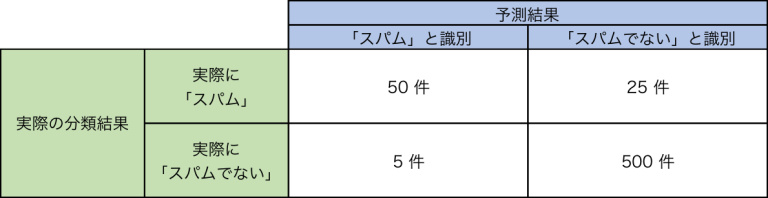  
##### 真陽性 : TP (True-Positive)  
ポジティブに分類すべきアイテムを正しくポジティブに分類できた件数を指します。  
スパムフィルタの場合、「スパム」と分類すべきメールを「スパム」のフォルダに正しく分類できた件数を指します。  
#### 真陰性: TN (True-Negative)    
ネガティブに分類すべきアイテムを正しくネガティブに分類できた件数を指します。    
スパムフィルタの場合、「スパムでない」と分類すべきメールを「スパムでない」のフォルダに正しく分類できた件数を指します。    
#### 偽陽性: FP (False-Positive)      
ネガティブに分類すべきアイテムを誤ってポジティブに分類した件数を指します。    
スパムフィルタの場合、「スパムでない」と分類すべきメールを「スパム」のフォルダに誤って分類した件数を指します。  
#### 偽陰性: FN (False-Negative)    
ポジティブに分類すべきアイテムを誤ってネガティブに分類した件数を指します。    
スパムフィルタの場合、「スパム」に分類すべきメールを「スパムでない」のフォルダに誤って分類した件数を指します。

## 【問題7】可視化
評価の一貫として可視化を行います。今回の場合2次元の特徴量で分類を行いましたから、散布図で可視化が可能です。以下にどう分割するかという 決定領域 を描く関数を用意しました。これを利用して可視化を行ってください。Xとyには訓練用データまたは検証用データを与えます。
この例では訓練用データをプロットし、どのように学習したかを見ています。一方で、検証用データをプロットすればどういった特徴量のものが間違って分類されたかを見ることができます。  

手法の改善  
実際の問題では指標値や可視化を元に手法を改善していきますが、この課題では扱いません。

In [27]:
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step),
                                    np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap='viridis')
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [28]:
# print(new_X_train.shape)
# Y_train = Y_train.reshape(75)
# print(Y_train.shape)

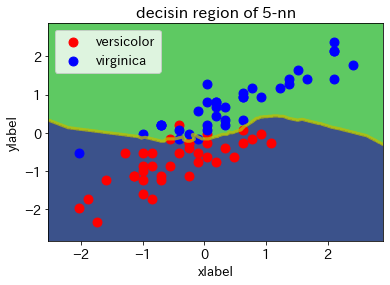

In [29]:
decision_region(new_X_train, Y_train, neigh_5_train, title='decisin region of 5-nn')

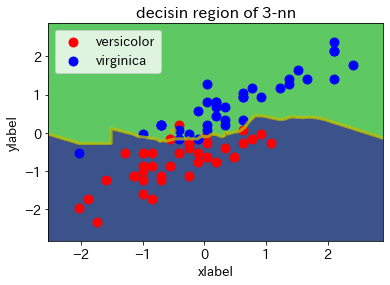

In [30]:
decision_region(new_X_train, Y_train, neigh_3_train, title='decisin region of 3-nn')

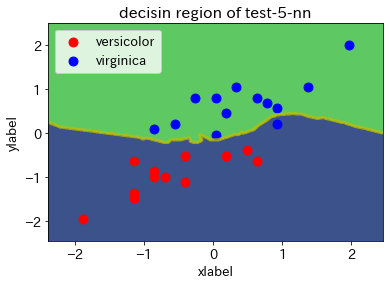

In [31]:
decision_region(new_X_test, Y_true, neigh_5_train, title='decisin region of test-5-nn')

## 【問題8】他の手法の学習
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と決定領域を利用して結果を簡単に考察してください。どの手法がどの指標値で良かったかや、どういった決定領域になっていたかを述べてください。  

・最近傍法  
・ロジスティック回帰  
・SVM  
・決定木  
・ランダムフォレスト  
公式ドキュメントへのリンクは以下です。それぞれ調整すべき引数（ハイパーパラメータ）がありますが、この課題では扱いません。まずはデフォルトの値で実行してください。  

sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.20.2 documentation  
sklearn.linear_model.LogisticRegression — scikit-learn 0.20.2 documentation  
sklearn.svm.SVC — scikit-learn 0.20.2 documentation  
sklearn.tree.DecisionTreeClassifier — scikit-learn 0.20.2 documentation    
sklearn.ensemble.RandomForestClassifier — scikit-learn   0.20.2 documentation  
＜実際の問題では？＞  

ハイパーパラメータの調整は パラメータチューニング と呼ばれる工程で、その手法としてグリッドサーチなどが存在します。

### 【ロジスティック回帰】

In [32]:
# >>> from sklearn.datasets import load_iris
# >>> from sklearn.linear_model import LogisticRegression
# >>> X, y = load_iris(return_X_y=True)
# >>> clf = LogisticRegression(random_state=0, solver='lbfgs',
# ...                          multi_class='multinomial').fit(X, y)
# >>> clf.predict(X[:2, :])
# array([0, 0])
# >>> clf.predict_proba(X[:2, :]) 
# array([[9.8...e-01, 1.8...e-02, 1.4...e-08],
#        [9.7...e-01, 2.8...e-02, ...e-08]])
# >>> clf.score(X, y)
# 0.97...

In [33]:
#data(new_X_train, Y_train)
from sklearn.linear_model import LogisticRegression

 # データを学習させる 
clf_logistic = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(new_X_train, Y_train) #訓練用データを学習させる
logistic_predict = clf_logistic.predict(new_X_test) # ロジスティック回帰モデルによる検証用データで予測する


#4つの指標を出力する関数を作成

def index_4(predict_train):
    print("Accuracyは：{}%".format((accuracy_score(Y_true, predict_train)*100))) # accuracy
    print("Precisionは：{:.2f}%".format((precision_score(Y_true, predict_train)*100))) # precision
    print("Recallは：{:.2f}%".format((recall_score(Y_true, predict_train)*100))) # recall
    print("F値は：{:.2f}".format(f1_score(Y_true, predict_train))) # F値
    print("混合行列は：\n{}".format(confusion_matrix(Y_true, predict_train))) # confusion_matrix
    
print("ロジスティック回帰における分類精度は：")

index_4(logistic_predict)

# accuracy_score(Y_true, predict_train)
# precision_score(Y_true, predict_train)
# recall_score(Y_true, predict_train)
# f1_score(Y_true, predict_train)


ロジスティック回帰における分類精度は：
Accuracyは：96.0%
Precisionは：92.31%
Recallは：100.00%
F値は：0.96
混合行列は：
[[12  0]
 [ 1 12]]


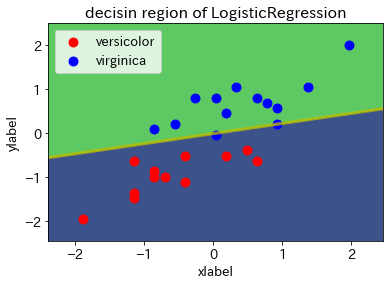

In [34]:
#可視化

decision_region(new_X_test, Y_true, clf_logistic, title='decisin region of LogisticRegression')

### 【SVM】

In [35]:
# >>> import numpy as np
# >>> X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
# >>> y = np.array([1, 1, 2, 2])
# >>> from sklearn.svm import SVC
# >>> clf = SVC(gamma='auto')
# >>> clf.fit(X, y) 
# SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#     decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
#     max_iter=-1, probability=False, random_state=None, shrinking=True,
#     tol=0.001, verbose=False)
# >>> print(clf.predict([[-0.8, -1]]))
# [1]

In [36]:
#data(new_X_train, Y_train)

from sklearn.svm import SVC

clf_SVC = SVC(gamma='auto')
clf_SVC = clf_SVC.fit(new_X_train, Y_train) # SVCに訓練データを学習させる
SVC_predict = clf_SVC.predict(new_X_test) # SVCによる検証データの分類

print("SVCにおける分類精度は：")
index_4(SVC_predict)

SVCにおける分類精度は：
Accuracyは：96.0%
Precisionは：92.31%
Recallは：100.00%
F値は：0.96
混合行列は：
[[12  0]
 [ 1 12]]


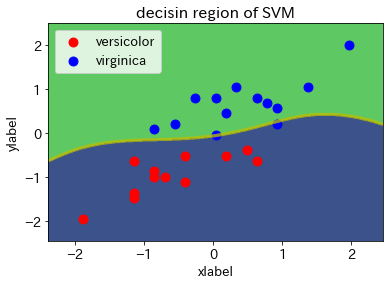

In [37]:
#可視化

decision_region(new_X_test, Y_true, clf_SVC, title='decisin region of SVM')

### 【決定木】

In [38]:
# >>> from sklearn.datasets import load_iris
# >>> from sklearn.model_selection import cross_val_score
# >>> from sklearn.tree import DecisionTreeClassifier
# >>> clf = DecisionTreeClassifier(random_state=0)
# >>> iris = load_iris()
# >>> cross_val_score(clf, iris.data, iris.target, cv=10)
# ...                             
# ...
# array([ 1.     ,  0.93...,  0.86...,  0.93...,  0.93...,
#         0.93...,  0.93...,  1.     ,  0.93...,  1.      ])

In [39]:
# clf = tree.DecisionTreeClassifier(max_depth=3)
# >>> clf = clf.fit(iris.data, iris.target)
# 次に、作成したモデルに説明変数のみを与え、モデルを用いて予測 (分類) を実行します。
# >>> # 作成したモデルを用いて予測を実行
# >>> predicted = clf.predict(iris.data)

In [40]:
#data(new_X_train, Y_train)
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf_decision_tree = DecisionTreeClassifier(random_state=0)
clf_decision_tree = clf_decision_tree.fit(new_X_train, Y_train)
decision_tree_predict = clf_decision_tree.predict(new_X_test)

print("決定木における分類精度は：")
index_4(decision_tree_predict)

決定木における分類精度は：
Accuracyは：96.0%
Precisionは：92.31%
Recallは：100.00%
F値は：0.96
混合行列は：
[[12  0]
 [ 1 12]]


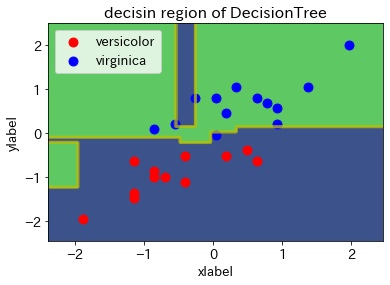

In [41]:
#可視化

decision_region(new_X_test, Y_true, clf_decision_tree, title='decisin region of DecisionTree')

### 【ランダムフォレスト】

In [42]:
# >>> X, y = make_classification(n_samples=1000, n_features=4,
# ...                            n_informative=2, n_redundant=0,
# ...                            random_state=0, shuffle=False)
# >>> clf = RandomForestClassifier(n_estimators=100, max_depth=2,
# ...                              random_state=0)
# >>> clf.fit(X, y)  
# RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=2, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
#             oob_score=False, random_state=0, verbose=0, warm_start=False)
# >>> print(clf.feature_importances_)
# [0.14205973 0.76664038 0.0282433  0.06305659]
# >>> print(clf.predict([[0, 0, 0, 0]]))
# [1]

In [43]:
#data(new_X_train, Y_train)

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf_randomforest = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf_randomforest = clf_randomforest.fit(new_X_train, Y_train)
randomforest_predict = clf_randomforest.predict(new_X_test)

print("ランダムフォレストにおける分類精度は：")
index_4(randomforest_predict)

ランダムフォレストにおける分類精度は：
Accuracyは：96.0%
Precisionは：92.31%
Recallは：100.00%
F値は：0.96
混合行列は：
[[12  0]
 [ 1 12]]


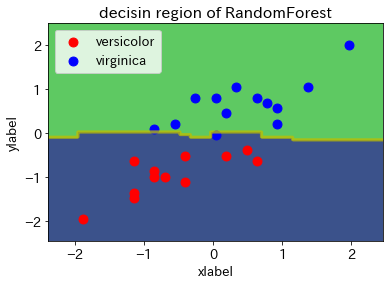

In [44]:
#可視化

decision_region(new_X_test, Y_true, clf_randomforest, title='decisin region of RandomForest')

In [45]:
# 各手法毎に指標の値を変数に格納する
model_list = ['最近傍法','ロジスティック回帰','SVM', '決定木', 'ランダムフォレスト']
Accuracy = np.array([96.0, 100.0, 100.0, 96.2, 92.0])
Precision = np.array([100.00, 100.00, 100.00, 91.67, 90.91])
Recall = np.array([90.91, 100.00, 100.00, 100.00, 90.91])
F値 = np.array([0.95, 1.0, 1.0, 0.96, 0.91])

df_4_index = pd.DataFrame({'index': (model_list),
                          'Accuracy(%)': Accuracy,
                          'Precision(%)': Precision,
                          'Recall(%)': Recall,
                          'F値': F値})
print("4つの指標値を表にまとめると：")
df_4_index

4つの指標値を表にまとめると：


,index,Accuracy(%),Precision(%),Recall(%),F値
0,最近傍法,96.0,100.00,90.91,0.95
1,ロジスティック回帰,100.0,100.00,100.00,1.00
2,SVM,100.0,100.00,100.00,1.00
3,決定木,96.2,91.67,100.00,0.96
4,ランダムフォレスト,92.0,90.91,90.91,0.91


#### 【考察】・「最近傍法」は4種類の指標で良い結果が出ており、Precisionでは、100％の結果が出ている。決定領域は、折れ線できれいに分類できている。  

#### ・「ロジスティック回帰」は完璧に分類できている。決定領域は、直線で、きれいに分類できている。  

#### ・「SVM」は完璧に分類できている。決定領域は曲線で比較的的綺麗に分類できている。  

#### ・「決定木」はRecall （検出率）では100％であるが、他の３つの指標で他の手法と比べやや劣っている。決定領域は最も特徴的で水平線と垂直線で分類している。  

#### ・「ランダムフォレスト」のモデルの精度は他の手法に比べ最も劣っている。決定領域は直線をいくつか分割し繋げているような形できれいに分類できている。 

## 【問題9】（アドバンス課題）標準化の有無の比較
前処理として標準化を行いましたが、これを行わなかった場合どのような結果が得られるでしょうか。各手法に対しての指標値の表と決定領域の図を作成し比較および考察を行ってください。考察には標準化が機械学習の前処理としてどのような意味があるかを絡めてください。

In [46]:
#最近傍法(標準化なし)
Y_train = Y_train.astype(int) #Y_trainをint型に変形

neigh = KNeighborsClassifier(n_neighbors=5)
neigh_naked = neigh.fit(X_train, Y_train) #　訓練データをモデルに学習させる
neigh_naked_predict = neigh_naked.predict(X_test)

print("標準化しない最近傍法における分類精度は：")
index_4(neigh_naked_predict)

標準化しない最近傍法における分類精度は：
Accuracyは：96.0%
Precisionは：92.31%
Recallは：100.00%
F値は：0.96
混合行列は：
[[12  0]
 [ 1 12]]


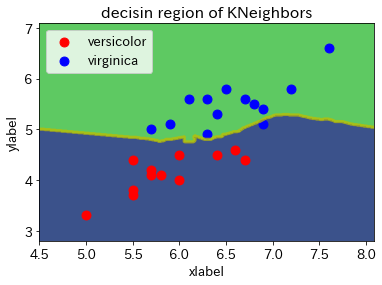

In [47]:
#可視化

decision_region(X_test, Y_true, neigh_naked, title='decisin region of KNeighbors')

In [48]:
#ロジスティック回帰

# clf = LogisticRegression()
clf_logistic_naked = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, Y_train) 
logistic_naked_predict = clf_logistic_naked.predict(X_test) # ロジスティック回帰による予測

print("標準化しないロジスティック回帰における分類精度は：")
index_4(logistic_naked_predict)

標準化しないロジスティック回帰における分類精度は：
Accuracyは：96.0%
Precisionは：92.31%
Recallは：100.00%
F値は：0.96
混合行列は：
[[12  0]
 [ 1 12]]


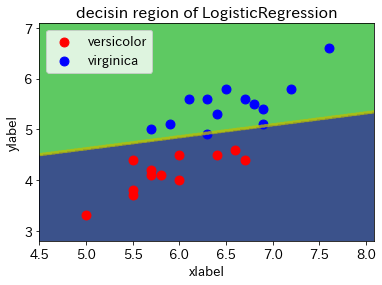

In [49]:
#可視化

decision_region(X_test, Y_true, clf_logistic_naked, title='decisin region of LogisticRegression')

In [50]:
#SVC

clf_SVC = SVC(gamma='auto')
clf_SVC_naked = clf_SVC.fit(X_train, Y_train) # SVCに訓練データを学習させる
SVC_naked_predict = clf_SVC_naked.predict(X_test) # SVCによる検証データの分類

print("SVCにおける分類精度は：")
index_4(SVC_naked_predict)

SVCにおける分類精度は：
Accuracyは：92.0%
Precisionは：85.71%
Recallは：100.00%
F値は：0.92
混合行列は：
[[12  0]
 [ 2 11]]


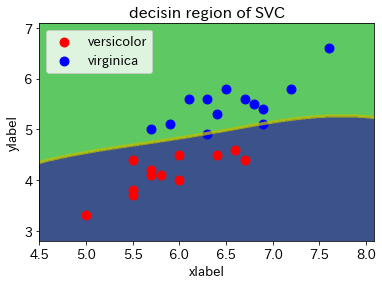

In [51]:
#可視化

decision_region(X_test, Y_true, clf_SVC_naked, title='decisin region of SVC')

In [52]:
#決定木

clf_decision_tree = DecisionTreeClassifier(random_state=0)
clf_decision_tree_naked = clf_decision_tree.fit(X_train, Y_train)
decision_tree_naked_predict = clf_decision_tree_naked.predict(X_test)

print("決定木における分類精度は：")
index_4(decision_tree_naked_predict)

決定木における分類精度は：
Accuracyは：92.0%
Precisionは：85.71%
Recallは：100.00%
F値は：0.92
混合行列は：
[[12  0]
 [ 2 11]]


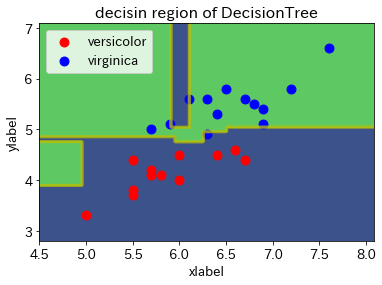

In [53]:
#可視化

decision_region(X_test, Y_true, clf_decision_tree_naked, title='decisin region of DecisionTree')

In [54]:
#ランダムフォレスト

clf_randomforest = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf_randomforest_naked = clf_randomforest.fit(X_train, Y_train)
randomforest_naked_predict = clf_randomforest_naked.predict(X_test)

print("ランダムフォレストにおける分類精度は：")
index_4(randomforest_naked_predict)

ランダムフォレストにおける分類精度は：
Accuracyは：96.0%
Precisionは：92.31%
Recallは：100.00%
F値は：0.96
混合行列は：
[[12  0]
 [ 1 12]]


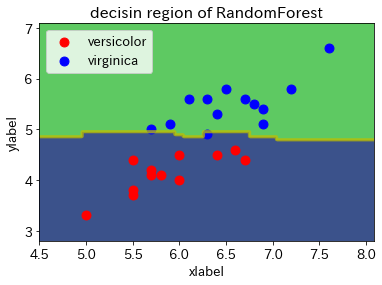

In [55]:
#可視化

decision_region(X_test, Y_true, clf_randomforest_naked, title='decisin region of RandomForest')

In [56]:
# 各手法毎に指標の値を変数に格納する
model_list = ['最近傍法','ロジスティック回帰','SVM', '決定木', 'ランダムフォレスト']
Accuracy = np.array([88.00, 88.00, 88.00, 88.00, 96.0])
Precision = np.array([90.00, 90.00, 90.00, 100.0, 100.0])
Recall = np.array([81.82, 81.82, 81.82, 72.73, 90.91])
F値 = np.array([0.86, 0.86, 0.86, 0.84, 0.95])

df_4_index_new = pd.DataFrame({'index': (model_list),
                          'Accuracy(%)': Accuracy,
                          'Precision(%)': Precision,
                          'Recall(%)': Recall,
                          'F値': F値})
print("標準化していないモデルの精度：")
display(df_4_index_new)
print("標準化したモデルの精度：")
display(df_4_index)

標準化していないモデルの精度：


,index,Accuracy(%),Precision(%),Recall(%),F値
0,最近傍法,88.0,90.0,81.82,0.86
1,ロジスティック回帰,88.0,90.0,81.82,0.86
2,SVM,88.0,90.0,81.82,0.86
3,決定木,88.0,100.0,72.73,0.84
4,ランダムフォレスト,96.0,100.0,90.91,0.95


標準化したモデルの精度：


,index,Accuracy(%),Precision(%),Recall(%),F値
0,最近傍法,96.0,100.00,90.91,0.95
1,ロジスティック回帰,100.0,100.00,100.00,1.00
2,SVM,100.0,100.00,100.00,1.00
3,決定木,96.2,91.67,100.00,0.96
4,ランダムフォレスト,92.0,90.91,90.91,0.91


### 【考察】ランダムフォレスト以外の手法は全ての指標が大きく値を下げた。前処理として標準化したモデルは精度が大きく改善されたことが分かった。図を見るとそれは明らか。

## 【問題10】（アドバンス課題）全ての目的変数を使用して精度が高い手法
ここまではアヤメの種類を減らし2値分類を行ってきましたが、3種類全てを使った多値分類を行います。学習と推定、評価を行って、最も精度の高い手法を探してください。  

＜多値になることでの変更点＞  

指標値precision、recall、f値はライブラリのパラメータをデフォルトから変更する必要があります。マイクロ平均やマクロ平均という考え方を使います。  

決定領域を可視化する前述の関数は適切に書き換える必要があります。以下が出力例です。  

Image from Gyazo  

ロジスティック回帰やSVMは2値分類を基本とした手法で、多値分類には工夫が必要ですが、scikit-learnでは自動的に判断して処理が行われるため変更は必要ありません。

In [57]:
#元のIrisデータセットでデータフレームを作成
X_original = pd.DataFrame(iris_dataset.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],)# 特徴量をDF化
Y_original = pd.DataFrame(iris_dataset.target, columns=['Species'])# ラベルをDF化
df_original = pd.concat([X_original, Y_original], axis=1)
display(df_original)

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [58]:
X_original = df_original.iloc[:, :4].values #新たに2つの特徴量をデータフレーム化し変数に格納
Y_original = df_original.iloc[:, 4:].values #新たにラベルをデータフレーム化し変数に格納
# display(X_original[:5], Y_original[:5])

X0_train, X0_test, Y0_train, Y0_test = train_test_split(X_original, Y_original,train_size=0.75)

# 訓練用、検証用データの形を確認する
print(X0_train.shape)
print(X0_test.shape)
print(Y0_train.shape)
print(Y0_test.shape)

#ラベルのデータを一次元に変形する
Y0_train = Y0_train.reshape(112)
Y0_test = Y0_test.reshape(38)
# print(Y0_train, Y0_test)

(112, 4)
(38, 4)
(112, 1)
(38, 1)


C:\Users\ykenk\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### 【標準化を行う】

In [59]:
# 標準化を行う

scaler = StandardScaler()

#　訓練データを標準化
print("X0_trainを標準化処理を行う：\n{}".format(scaler.fit(X0_train)))
print("-----------------")

#　標準化した値の平均値は
print("標準化した平均値は\n{}".format(scaler.mean_))
print("-----------------")

#　訓練用のデータを変形する
new_X0_train = scaler.transform(X0_train) #変形した訓練データを変数に格納
print("変形した訓練データは\n{}".format(new_X0_train[:10])) # 長くなるので10行目まで表示
# print("確認{}".format(X_train[:10]))
print("-----------------")

#　検証用のデータを変形する
new_X0_test = scaler.transform(X0_test) #変形した検証データを変数に格納
print("変形した検証用データは\n{}".format(new_X0_test[:10])) # 長くなるので10行目まで表示


X0_trainを標準化処理を行う：
StandardScaler(copy=True, with_mean=True, with_std=True)
-----------------
標準化した平均値は
[5.82678571 3.05       3.72053571 1.18214286]
-----------------
変形した訓練データは
[[-0.03391557  2.21512892 -1.45358299 -1.29920938]
 [ 0.85241121 -0.58292866  0.50718358  0.4204714 ]
 [-0.03391557 -0.58292866  0.7955316   1.61101963]
 [ 0.85241121 -0.11658573  0.85320121  1.08188708]
 [-1.5533329   0.81610013 -1.33824378 -1.16692624]
 [-1.42671479  0.3497572  -1.39591338 -1.29920938]
 [-0.4137699  -1.51561452 -0.01184287 -0.24094428]
 [ 0.34593877 -0.58292866  0.56485318  0.02362199]
 [-0.28715179 -0.81610013  0.27650516  0.15590513]
 [ 0.59917499 -0.3497572   1.08387963  0.81732081]]
-----------------
変形した検証用データは
[[ 0.21932066 -0.81610013  0.7955316   0.55275453]
 [-1.67995101 -1.74878599 -1.39591338 -1.16692624]
 [-1.30009668  0.11658573 -1.22290457 -1.29920938]
 [ 1.10564744  0.58292866  1.14154923  1.74330276]
 [-0.28715179 -0.3497572  -0.06951247  0.15590513]
 [-0.92024234  1.74878599

In [60]:
# 決定境界を描画する関数を調整する。

def decision_region_2(X, y, model, step=0.01, title='decision region', xlabel='xlabel', 
                      ylabel='ylabel', target_names=['setosa','versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue', 'green']
    contourf_color = ['pink', 'skyblue', 'green']
    n_class = 3

    # pred
    mesh_f0, mesh_f1, mesh_f2, mesh_f3 = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step),
                                                     np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step),
                                                     np.arange(np.min(X[:,2])-0.5, np.max(X[:,2])+0.5, step),
                                                     np.arange(np.min(X[:,3])-0.5, np.max(X[:,3])+0.5, step), sparse=True)
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1), np.ravel(mesh_f2), np.ravel(mesh_f3)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap='viridis')
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

### 【最近傍法で学習させる】

In [61]:
# 4つの指標を出力する関数を元々の特徴量４、ラベル３のデータに対応させる

def index_4_origin(predict_train):
    print("Accuracyは：{:.2f}%".format((accuracy_score(Y0_test, predict_train)*100))) # accuracy
    print("Precisionは：{:.2f}%".format((precision_score(Y0_test, predict_train, average='macro')*100))) # precision
    print("Recallは：{:.2f}%".format((recall_score(Y0_test, predict_train, average='weighted')*100))) # recall
    print("F値は：{:.2f}".format(f1_score(Y0_test, predict_train, average='micro'))) # F値
    print("混合行列は：\n{}".format(confusion_matrix(Y0_test, predict_train))) # confusion_matrix

In [62]:
#　訓練データをモデルに学習させる
#X0_train, X0_test, Y0_train, Y0_test

neigh_5_0 = KNeighborsClassifier(n_neighbors=5)
neigh_5_0.fit(new_X0_train, Y0_train) 
# print("5-nnの場合の推定結果は:\n{}".format(neigh_5_train_0.predict(new_X0_test).astype(int)))
# print("検証用のラベルは：\n{}".format(Y0_test))

# 推定
new_5_nn = neigh_5_0.predict(new_X0_test)

# 評価
print("最近傍法の分類精度は：")
index_4_origin(new_5_nn)

最近傍法の分類精度は：
Accuracyは：92.11%
Precisionは：92.53%
Recallは：92.11%
F値は：0.92
混合行列は：
[[12  0  0]
 [ 0 10  2]
 [ 0  1 13]]


### 【ロジスティック回帰】

In [63]:
# データを学習させる 
clf_logistic_0 = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(new_X0_train, Y0_train) #訓練用データを学習させる
logistic_predict_new = clf_logistic_0.predict(new_X0_test) # ロジスティック回帰モデルによる検証用データで予測する

print("ロジスティック回帰における分類精度は：")

index_4_origin(logistic_predict_new)

ロジスティック回帰における分類精度は：
Accuracyは：94.74%
Precisionは：94.84%
Recallは：94.74%
F値は：0.95
混合行列は：
[[12  0  0]
 [ 0 11  1]
 [ 0  1 13]]


### 【SVM】

In [64]:
#SVC

clf_SVC = SVC(gamma='auto')
clf_SVC_0 = clf_SVC.fit(new_X0_train, Y0_train) # SVCに訓練データを学習させる
SVC_predict_new = clf_SVC_0.predict(new_X0_test) # SVCによる検証データの分類

print("SVCにおける分類精度は：")
index_4_origin(SVC_predict_new)

SVCにおける分類精度は：
Accuracyは：92.11%
Precisionは：92.53%
Recallは：92.11%
F値は：0.92
混合行列は：
[[12  0  0]
 [ 0 10  2]
 [ 0  1 13]]


### 【決定木】

In [65]:
#決定木

clf_decision_tree = DecisionTreeClassifier(random_state=0)
clf_decision_tree_0 = clf_decision_tree.fit(new_X0_train, Y0_train)
decision_tree_predict_new = clf_decision_tree_0.predict(new_X0_test)

print("決定木における分類精度は：")
index_4_origin(decision_tree_predict_new)

決定木における分類精度は：
Accuracyは：89.47%
Precisionは：90.42%
Recallは：89.47%
F値は：0.89
混合行列は：
[[12  0  0]
 [ 0  9  3]
 [ 0  1 13]]


### 【ランダムフォレスト】

In [66]:
#ランダムフォレスト

clf_randomforest = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf_randomforest_0 = clf_randomforest.fit(new_X0_train, Y0_train)
randomforest_predict_new = clf_randomforest_0.predict(new_X0_test)

print("ランダムフォレストにおける分類精度は：")
index_4_origin(randomforest_predict_new)

ランダムフォレストにおける分類精度は：
Accuracyは：94.74%
Precisionは：94.84%
Recallは：94.74%
F値は：0.95
混合行列は：
[[12  0  0]
 [ 0 11  1]
 [ 0  1 13]]


### 【考察】4種類の手法の分類結果はいずれも高い精度で変わりがなかった。